# HW-5: Malware Classification (Due 5th January, 2023)

**Instructions:**

Suppose your company is struggling with a series of computer virus attacks for the past several months. The viruses were grouped into a few types with some effort. However, it takes a long time to sort out what kind of virus it is when been hit with. Thus, as a senior IT department member, you undertook a project to classify the virus as quickly as possible. You've been given a dataset of the features that may be handy (or not), and  also the associated virus type (target variable). 

You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc. To increase your grade you can add more elaboration such as using ensembling or exploiting feature selection/extraction techniques. **An evaluation rubric is provided.**

Please prepare a python notebook that describes the steps, present the results as well as your comments. 

You can download the data (csv file) [here](https://drive.google.com/file/d/1yxbibzUU8bjOyChDVFPfQ4viLduYdk29/view?usp=sharing).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv('hw5_data.csv', sep = ',')  #read file
df.replace([np.inf, -np.inf], np.nan, inplace=True) #some values are inf and -inf, those values are changed with nan 
df.fillna(999, inplace=True)  #fill nan values with 999
X = df.drop(['target'], axis=1)  # dataset
y = df[['target']]  #target


In [4]:
#FEAUTRE SELECTION
number_of_features = [50,100,200,400]  #number of features
features_x_transform = []
for i in number_of_features: #Datasets with 50, 100, 200 and 400 features are created
  select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="k_best", param=i)  #Filter Method is used
  select.fit(X,y)
  features_x_transform.append(select.transform(X)) 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [4]:
#LOGISTIC REGRESSION
ac_better = []
param_grid = [ {'model__C': [10,100]} ]  #logistic regression parameters "C"

le = LabelEncoder()
y = le.fit_transform(y)

for i in features_x_transform:
  lg_reg = Pipeline([('scaling', StandardScaler()),  #first dataset is scaled
                    ('model', LogisticRegression(solver='liblinear'))]) #then logistic regression model is fit


  lg_results = GridSearchCV(estimator=lg_reg, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)  #cross validation is made and best params is applied
  lg_results = lg_results.fit(i, y)

  score = cross_val_score(lg_results, i, y, cv=5).mean()
  ac_better.append( score )
  print(f"top {len(i[1])} features have {score} score with Logistic Regression")
  print(f"best params: {lg_results.best_params_}")

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


top 50 features have 0.6351279279279279 score with Logistic Regression
best params: {'model__C': 100}
top 100 features have 0.6189255255255255 score with Logistic Regression
best params: {'model__C': 100}
top 200 features have 0.6199243243243243 score with Logistic Regression
best params: {'model__C': 10}
top 400 features have 0.5841143143143144 score with Logistic Regression
best params: {'model__C': 10}


Text(0.5, 1.0, 'Logistic Regression Score')

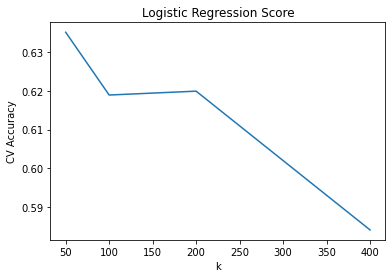

In [5]:
#plot logistic regression score
plt.plot(number_of_features, ac_better)
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('Logistic Regression Score')

In [6]:
#DECISION TREE CLASSIFIER
tree_score = []
#Decision tree parameters
param_grid_clf = [
  {'model__min_samples_leaf': [1, 5, 20],
   'model__max_depth': [5, 15],
   'model__criterion': ['gini', 'entropy']},
 ]

for i in features_x_transform:
  tree = Pipeline([('scaling', StandardScaler()),  #first dataset is scaled
                    ('model', DecisionTreeClassifier())]) #then decision tree classifier model is fit


  tree_result = GridSearchCV(estimator= tree, param_grid=param_grid_clf, scoring='accuracy', refit=True, cv=5)  #cross validation is made and best params is applied
  tree_result = tree_result.fit(i, y)

  score = cross_val_score(tree_result, i, y, cv=5).mean()
  tree_score.append( score )
  print(f"top {len(i[1])} features have {score} score with Decision Tree Classifier")
  print(f"best params: {tree_result.best_params_}")

top 50 features have 0.8315685685685686 score with Decision Tree Classifier
best params: {'model__criterion': 'entropy', 'model__max_depth': 15, 'model__min_samples_leaf': 20}
top 100 features have 0.8407721721721721 score with Decision Tree Classifier
best params: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__min_samples_leaf': 20}
top 200 features have 0.8371719719719719 score with Decision Tree Classifier
best params: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__min_samples_leaf': 5}
top 400 features have 0.8575751751751751 score with Decision Tree Classifier
best params: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__min_samples_leaf': 20}


Text(0.5, 1.0, 'Decision Tree Score')

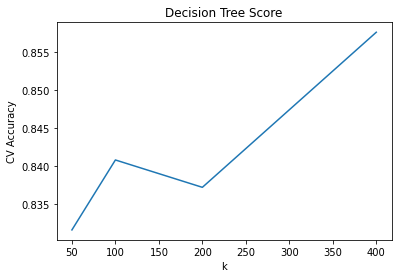

In [7]:
#plot decision tree score
plt.plot(number_of_features, tree_score)
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Score')

In [13]:
#SVM
svm_score = []
le = LabelEncoder()
y = le.fit_transform(y)

for i in features_x_transform:
  svm = Pipeline([('scaling', StandardScaler()),  #first dataset is scaled
                   ('model', SVC())]) #then svm  model is fit
                   
  svm_result = svm.fit(i, y)

  score = cross_val_score(svm_result, i, y, cv=5).mean()
  svm_score.append( score )
  print(f"top {len(i[1])} features have {score} score with SVM")


top 50 features have 0.5955217217217217 score with SVM
top 100 features have 0.5859193193193193 score with SVM
top 200 features have 0.6031183183183183 score with SVM
top 400 features have 0.6343269269269269 score with SVM


Text(0.5, 1.0, 'SVM Score')

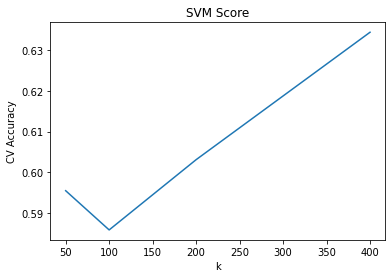

In [14]:
#plot svm score
plt.plot(number_of_features, svm_score)
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('SVM Score')

We can see that the Decision tree is better than svm and logistic regression. Although different parameters changed the results, each classifier did not make a big difference in itself.

In [ ]:
#VOTING
clf1 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', random_state=0)
clf2 = LogisticRegression(solver='liblinear')
clf3 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=1)

pipe1 = Pipeline([('scaler', StandardScaler()),('logreg1', clf1)])
pipe2 = Pipeline([('scaler', StandardScaler()),('logreg2', clf2)])
pipe3 = Pipeline([('scaler', StandardScaler()),('tree', clf3)])

le = LabelEncoder()
y = le.fit_transform(y)

for i in features_x_transform:
  print(f'Scores {len(i[1])} features')
  X_train, X_test, y_train, y_test = train_test_split(i, y, test_size=0.33, random_state=1)

  labs = ['Logistic Regression 1', 'Logistic Regression 2', 'Decision Tree']
  clfs = [pipe1, pipe2, pipe3]
  clfs = zip(labs, clfs)

  for lab, clf in clfs:
      scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='accuracy')
      print(f'{scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

  ems = [('lr1', pipe1),('lr2', pipe2), ('tree', pipe3)]
  clf = VotingClassifier(estimators= ems, weights=None, voting='soft')

  scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='accuracy')
  print(f'{scores.mean():.3f} (+/- {scores.std():.3f}) [Ensemble]')
  print("**************************************")

Scores 50 features
0.55 (+/- 0.01) [Logistic Regression 1]
0.63 (+/- 0.03) [Logistic Regression 2]
0.79 (+/- 0.02) [Decision Tree]
0.789 (+/- 0.020) [Ensemble]
**************************************
Scores 100 features
0.55 (+/- 0.01) [Logistic Regression 1]
0.62 (+/- 0.02) [Logistic Regression 2]
0.81 (+/- 0.02) [Decision Tree]
0.813 (+/- 0.022) [Ensemble]
**************************************
Scores 200 features
0.56 (+/- 0.02) [Logistic Regression 1]
0.61 (+/- 0.03) [Logistic Regression 2]
0.81 (+/- 0.02) [Decision Tree]
0.822 (+/- 0.016) [Ensemble]
**************************************
Scores 400 features
0.59 (+/- 0.02) [Logistic Regression 1]
0.56 (+/- 0.03) [Logistic Regression 2]
0.82 (+/- 0.02) [Decision Tree]
0.786 (+/- 0.021) [Ensemble]
**************************************


The decision tree classifier got a better result for each Feature number I tried. When we combined all of them with the Voting classifier, we obtained a less successful result than the decision tree, but a much better result than the logistic regression results.

In [ ]:
#BAGGING
bag_cls = []
bag_names = []

param_grid_lr = [ {'base_estimator__C': [0.1,10],
                   'base_estimator__max_iter': [5000,10000]}]
bag_cls.append(GridSearchCV(BaggingClassifier(LogisticRegression(solver='liblinear', multi_class='auto'), n_estimators=20, max_samples=0.6, oob_score=True),
                            param_grid = param_grid_lr))
bag_names.append('Bag(LRx20)')

param_grid_dt = [{
    'base_estimator__max_depth' : [2,5],
    }]
bag_cls.append(GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, max_samples=0.6, oob_score=True),
                            param_grid = param_grid_dt))
bag_names.append("Bag(DTx20)")

print(f'Scores {len(features_x_transform[0][1])} features')
X_train, X_test, y_train, y_test = train_test_split(features_x_transform[0], y, test_size=0.33, random_state=1)
for model, name in zip(bag_cls, bag_names):
  model.fit(X_train, y_train)
  scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring='accuracy')
  print(f'{scores.mean():.3f} (+/- {scores.std():.3f}) [{name}] -> best_params: {model.best_params_}')

Scores 50 features
0.580 (+/- 0.011) [Bag(LRx20)] -> best_params: {'base_estimator__C': 10, 'base_estimator__max_iter': 5000}
0.821 (+/- 0.018) [Bag(DTx20)] -> best_params: {'base_estimator__max_depth': 5}


If we look at the logistic regression score and the decision tree score before making the bag, we can't see much difference in the results. I did not observe an increase as much as the voting.

In [16]:
forest1 = Pipeline([('scaler', StandardScaler()),('forest1', RandomForestClassifier(n_estimators=100, oob_score=True))])
forest2 = Pipeline([('scaler', StandardScaler()),('forest2', RandomForestClassifier(n_estimators=200, oob_score=True))])
forest3 = Pipeline([('scaler', StandardScaler()),('forest3', RandomForestClassifier(n_estimators=400, oob_score=True))])
for i in features_x_transform:
  print(f'Scores {len(i[1])} features')
  X_train, X_test, y_train, y_test = train_test_split(i, y, test_size=0.33, random_state=1)

  labs = ['RandomForest,estimator:100', 'RandomForest,estimator:200', 'RandomForest,estimator:400']
  clfs = [forest1, forest2, forest3]
  clfs = zip(labs, clfs)

  for lab, clf in clfs:
      scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='accuracy')
      print(f'{scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

  print("**************************************")

Scores 50 features
0.89 (+/- 0.01) [RandomForest,estimator:100]
0.89 (+/- 0.02) [RandomForest,estimator:200]
0.89 (+/- 0.01) [RandomForest,estimator:400]
**************************************
Scores 100 features
0.89 (+/- 0.02) [RandomForest,estimator:100]
0.90 (+/- 0.01) [RandomForest,estimator:200]
0.90 (+/- 0.01) [RandomForest,estimator:400]
**************************************
Scores 200 features
0.90 (+/- 0.01) [RandomForest,estimator:100]
0.90 (+/- 0.01) [RandomForest,estimator:200]
0.90 (+/- 0.01) [RandomForest,estimator:400]
**************************************
Scores 400 features
0.90 (+/- 0.01) [RandomForest,estimator:100]
0.90 (+/- 0.01) [RandomForest,estimator:200]
0.90 (+/- 0.01) [RandomForest,estimator:400]
**************************************


Random forest classifier performed better than each classifier. Since it does not take too long in terms of time, this model can be selected with parameters that give better results by changing the parameters.

REFERENCES:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html   => fillna methods

https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once   => gridsearchcv with pipeline

I benefited from lecture presentations and sample codes covered in the course.